# Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/content/data-37.txt', delim_whitespace=True, header=None, names=['t', 'y(t)'])
print(data.head(10))

      t    y(t)
0  0.01  3.5946
1  0.02  3.6419
2  0.04  3.5860
3  0.05  3.6015
4  0.06  3.4807
5  0.07  3.5506
6  0.08  3.4489
7  0.09  3.4826
8  0.11  3.4934
9  0.12  3.4119


<ipython-input-1-a7c76f39a270>:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('/content/data-37.txt', delim_whitespace=True, header=None, names=['t', 'y(t)'])


# Given Models for Testing

In [2]:
# Defining three differnet Models

# Model 1 (Exponential Regression Model)
def model1(t, alpha0, alpha1, beta1, alpha2, beta2):
    return alpha0 + alpha1 * np.exp(beta1 * t) + alpha2 * np.exp(beta2 * t)
# Model 2 (Rational Regression Model)
def model2(t, alpha0, alpha1, beta0, beta1):
    return (alpha0 + alpha1 * t) / (beta0 + beta1 * t)
# Model 3 (Polynomial Regression Model)
def model3(t, beta0, beta1, beta2, beta3, beta4):
    return beta0 + beta1 * t + beta2 * t**2 + beta3 * t**3 + beta4 * t**4

# Part- 1,2: Least Square Estimation for Unknown Parameters

In [3]:
from scipy.optimize import curve_fit
# Data Set Provided
y=data['y(t)']
t=data['t']

# Fitting Models with data provided
params1, pconv1 = curve_fit(model1, t, y, p0=[3, 1, -1, 1, -1])
params2, pconv2 = curve_fit(model2, t, y, p0=[3, 0.5, 1, -0.5])
params3, pconv3 = curve_fit(model3, t, y, p0=[3, -1, 1, -1, 1])

# Calculate fitted values
y_pred1 = model1(t, *params1)
y_pred2 = model2(t, *params2)
y_pred3 = model3(t, *params3)

# Calculating Residuals
residuals1 = y - y_pred1
residuals2 = y - y_pred2
residuals3 = y - y_pred3

# Sum of squares of residuals(SSR)
ssr1 = np.sum(residuals1**2)
ssr2 = np.sum(residuals2**2)
ssr3 = np.sum(residuals3**2)

# Best Model - For which the ssr value will be least
best_model = min((ssr1, 'Model 1'), (ssr2, 'Model 2'), (ssr3, 'Model 3'))
best_model_name = best_model[1]

In [4]:
print("Model 1", params1)
print("Model 2", params2)
print("Model 3", params3)

Model 1 [ 2.24822521  0.75791348 -1.19816668  0.63901615 -1.19752691]
Model 2 [18.12240246  5.58007048  4.96483903  3.9314642 ]
Model 3 [ 3.62516562 -1.36703762 -0.0918586   0.98043964 -0.46943353]


# Part-3: Best Fit Model

In [5]:
best_model_name

'Model 3'

# Part-4: Estimate of Variance for the best Model

In [6]:
from scipy.stats import chi2

# Variance estimate for best model(Model 3)
if best_model_name == 'Model 1':
    sigma2 = ssr1 / (len(t) - len(params1))
    params_best = params1
    residuals_best = residuals1
elif best_model_name == 'Model 2':
    sigma2 = ssr2 / (len(t) - len(params2))
    params_best = params2
    residuals_best = residuals2
else:
    sigma2 = ssr3 / (len(t) - len(params3))
    params_best = params3
    residuals_best = residuals3

print(f"\nBest Model: {best_model_name}")
print(f"Residual Sum of Squares (SSR): {min(ssr1, ssr2, ssr3):.4f}")
print(f"Estimated Variance (σ^2): {sigma2:.4f}")


Best Model: Model 3
Residual Sum of Squares (SSR): 0.1432
Estimated Variance (σ^2): 0.0018


In [7]:
# SSR for each model
print(ssr1)
print(ssr2)
print(ssr3)
#Variance for each model
print(ssr1 / (len(t) - len(params1)))
print(ssr2 / (len(t) - len(params2)))
print(ssr3 / (len(t) - len(params3)))

0.14574596529735528
0.14796560185934068
0.14315327263637562
0.001821824566216941
0.0018267358254239591
0.0017894159079546953


# Part-5: Confidence Interval

In [10]:
# 95% Confidence Interval
from scipy import stats
alpha = 0.05
CI = 0.95
num_params = len(params_best)
confidence_intervals = []
standard_errors = np.sqrt(np.diag(pconv3))
Z= stats.norm.ppf((1 - CI) / 2)

for i in range(num_params):
  delta = Z * standard_errors[i]
  confidence_intervals.append((params_best[i] - delta, params_best[i] + delta))

print("Optimized Parameters:", params_best)
print("Standard Errors:", standard_errors)
print("95% Confidence Intervals:", confidence_intervals)

Optimized Parameters: [ 3.62516562 -1.36703762 -0.0918586   0.98043964 -0.46943353]
Standard Errors: [0.0245748  0.33196087 1.32292822 1.95905771 0.96073874]
95% Confidence Intervals: [(3.6733313343298004, 3.5769998984976343), (-0.7164062775492698, -2.0176689596053703), (2.501033072605175, -2.6847502715027325), (4.820122199125774, -2.859242927214341), (1.4135798009989946, -2.352446859263766)]


# Part-6: Plot of Residuals Obtained from Best Model

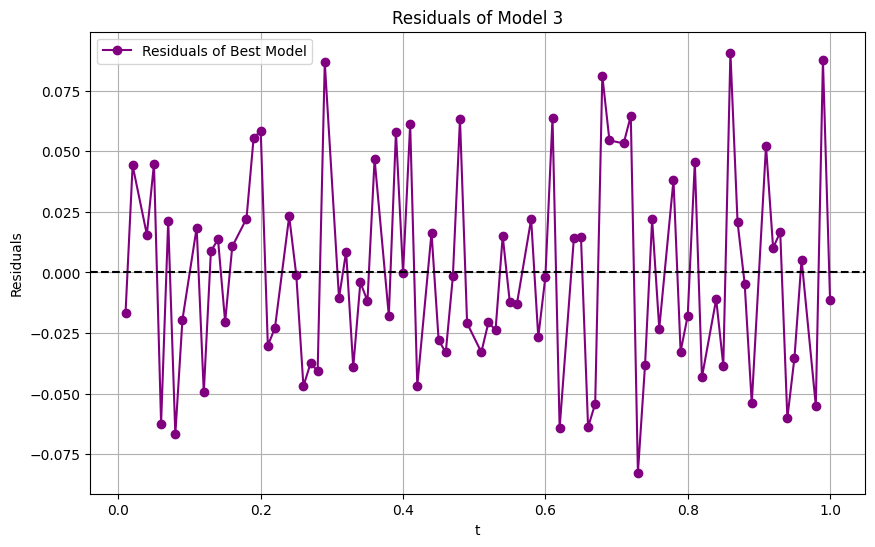

In [11]:
# Plot residuals of the best model( Model 3)
plt.figure(figsize=(10, 6))
plt.plot(t, residuals_best, 'o-', color='purple', label='Residuals of Best Model')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('t')
plt.ylabel('Residuals')
plt.title(f'Residuals of {best_model_name}')
plt.legend()
plt.grid(True)
plt.show()
#Sum of the residuals will approach zero

# Part-7 : Normality Check

## Implemented Shapiro-Wilk Test for checking the normality assumption.

In [12]:
from scipy.stats import shapiro

# Performing Shapiro-Wilk test for normality
shapiro_test_1 = shapiro(residuals1)
shapiro_test_2 = shapiro(residuals2)
shapiro_test_3 = shapiro(residuals3)
#This will give p-value which we can compare with 0.05 and discuss the normality

In [13]:
print("Shapiro-Wilk Test Model 1:", shapiro_test_1)
print("Shapiro-Wilk Test Model 2:", shapiro_test_2)
print("Shapiro-Wilk Test Model 3:", shapiro_test_3)

Shapiro-Wilk Test Model 1: ShapiroResult(statistic=0.9799056606323593, pvalue=0.20707972102671557)
Shapiro-Wilk Test Model 2: ShapiroResult(statistic=0.9827064955085508, pvalue=0.3132782470845835)
Shapiro-Wilk Test Model 3: ShapiroResult(statistic=0.9738920931841628, pvalue=0.08193493140417454)


## Alternative Check through Graphs

Text(0.5, 1.0, 'Q-Q Plot Res1')

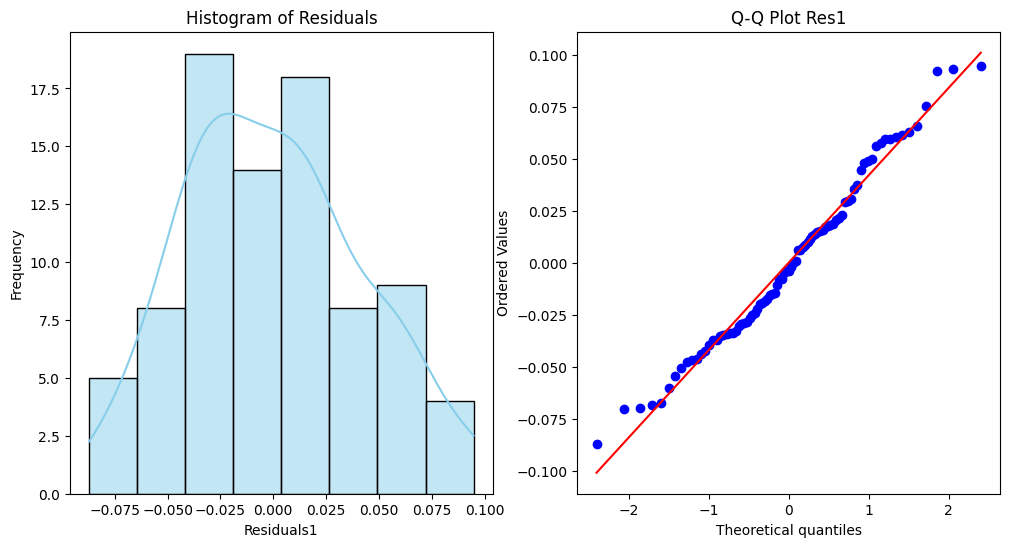

In [14]:
#Checking Normality using histograms
#Check Resemblance with gaussian Distribution
import seaborn as sns
from scipy import stats

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(residuals1, kde=True, color='skyblue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals1')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
stats.probplot(residuals1, dist="norm", plot=plt)
plt.title('Q-Q Plot Res1')

Text(0.5, 1.0, 'Q-Q Plot Res2')

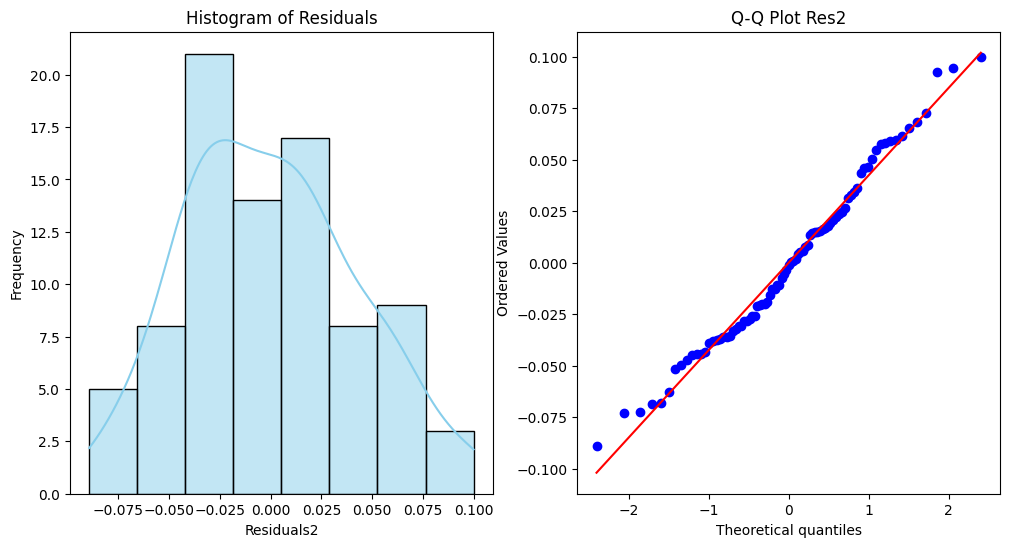

In [15]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(residuals2, kde=True, color='skyblue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals2')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
stats.probplot(residuals2, dist="norm", plot=plt)
plt.title('Q-Q Plot Res2')

Text(0.5, 1.0, 'Q-Q Plot Res3')

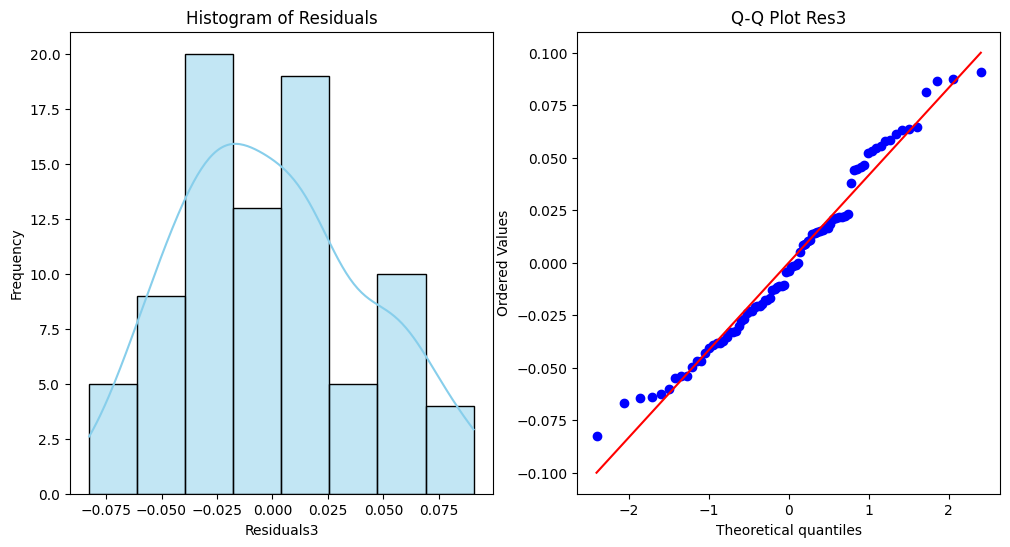

In [16]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(residuals3, kde=True, color='skyblue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals3')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
stats.probplot(residuals3, dist="norm", plot=plt)
plt.title('Q-Q Plot Res3')

# Part-8:  Observed data points and Fitted curve

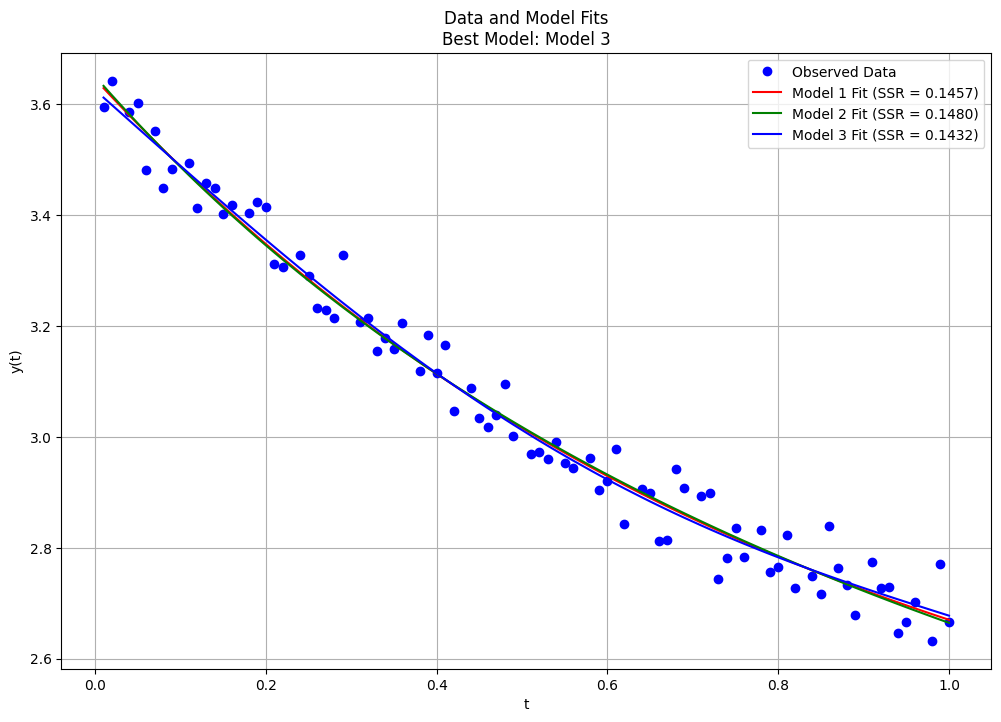

In [17]:
# Plot the data and the models
plt.figure(figsize=(12, 8))
plt.plot(t, y, 'bo', label='Observed Data')
plt.plot(t, y_pred1, 'r-', label=f'Model 1 Fit (SSR = {ssr1:.4f})')
plt.plot(t, y_pred2, 'g-', label=f'Model 2 Fit (SSR = {ssr2:.4f})')
plt.plot(t, y_pred3, 'b-', label=f'Model 3 Fit (SSR = {ssr3:.4f})')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title(f'Data and Model Fits\nBest Model: {best_model_name}')
plt.legend()
plt.grid(True)
plt.show()